<a href="https://colab.research.google.com/github/kouliki/celebal_task-9/blob/main/Celebal_task_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1- Install kaggle
!pip install kaggle

In [2]:
#Upload you API token kaggle.json:
from google.colab import files
files.upload()

Saving kaggle (6).json to kaggle (6).json


{'kaggle (6).json': b'{"username":"koulikimahato","key":"b6ce180c38dd23a9a62574b9da0bc963"}'}

In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

### Dataset importing

In [13]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
print(train.shape)
print(test.shape)


(15830, 4)
(3960, 3)


In [17]:
train

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160
...,...,...,...,...
15825,1429756073,44,False,53.624115
15826,1429756373,45,False,59.752296
15827,1429756673,48,False,52.147630
15828,1429756973,26,False,58.007545


In [18]:
test

,timestamp,value,predicted
0,1396332000,20.00000,20.000000
1,1396332300,20.00000,20.000000
2,1396332600,20.00000,20.000000
3,1396332900,20.00000,20.000000
4,1396333200,20.00000,20.000000
...,...,...,...
3955,1397518500,20.00384,19.836240
3956,1397518800,20.00384,19.207998
3957,1397519100,20.00384,20.103437
3958,1397519400,20.00384,19.346764


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Pre-Processing

### For training data

In [19]:
train.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB


In [21]:
train.describe()

,timestamp,value,predicted
count,1.583000e+04,15830.000000,15830.000000
mean,1.427383e+09,85.572205,71.870715
std,1.370962e+06,321.760918,92.450520
min,1.425009e+09,0.000000,-281.389070
25%,1.426196e+09,29.000000,32.919171
50%,1.427383e+09,47.000000,49.771124
75%,1.428570e+09,76.000000,75.948052
max,1.429757e+09,13479.000000,2716.127200


In [23]:
print("the null values are :")
print("\n")
print(train.isnull().sum())
print("\n")

the null values are :


timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64




In [25]:
# after removing null values

data= train.dropna()
print("After removing the null values the new count is :")
print("\n")
print(train.isnull().sum())
print("\n")

After removing the null values the new count is :


timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64




In [26]:
print("the duplicated values count:")
print(train.duplicated().sum())
print("\n")

the duplicated values count:
0




In [27]:
print("Renaming the columns after removing the starting space")
print("\n")
train.columns=train.columns.str.strip()
train.head()

Renaming the columns after removing the starting space




,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [28]:
train.dtypes

timestamp       int64
value           int64
is_anomaly       bool
predicted     float64
dtype: object

In [33]:
# Assuming you want to count the values in a column named 'target_variable'
train['value'].value_counts()

value
29      259
21      252
33      251
30      251
26      245
       ... 
858       1
415       1
1549      1
253       1
838       1
Name: count, Length: 631, dtype: int64

In [35]:
# Convert timestamp to datetime
train['datetime'] = pd.to_datetime(train['timestamp'], unit='s')

### for testing data

In [39]:
test.head()

,timestamp,value,predicted,value_normalized
0,1396332000,20.0,20.0,0.001484
1,1396332300,20.0,20.0,0.001484
2,1396332600,20.0,20.0,0.001484
3,1396332900,20.0,20.0,0.001484
4,1396333200,20.0,20.0,0.001484


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         3960 non-null   int64  
 1   value             3960 non-null   float64
 2   predicted         3960 non-null   float64
 3   value_normalized  3960 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 123.9 KB


In [41]:
test.describe()

,timestamp,value,predicted,value_normalized
count,3.960000e+03,3960.000000,3960.000000,3960.000000
mean,1.396926e+09,42.909050,43.841335,0.003183
std,3.429894e+05,28.040740,28.315249,0.002080
min,1.396332e+09,20.000000,3.158210,0.001484
25%,1.396629e+09,20.000000,20.037745,0.001484
50%,1.396926e+09,20.480000,22.011872,0.001519
75%,1.397223e+09,79.904000,79.077084,0.005928
max,1.397520e+09,79.999969,114.857970,0.005935


In [47]:
print("the null values are :")
print("\n")
print(test.isnull().sum())
print("\n")

the null values are :


timestamp           0
value               0
predicted           0
value_normalized    0
dtype: int64




In [48]:
# after removing null values

data= train.dropna()
print("After removing the null values the new count is :")
print("\n")
print(test.isnull().sum())
print("\n")

After removing the null values the new count is :


timestamp           0
value               0
predicted           0
value_normalized    0
dtype: int64




In [49]:
print("the duplicated values count:")
print(test.duplicated().sum())
print("\n")

the duplicated values count:
0




In [50]:
print("Renaming the columns after removing the starting space")
print("\n")
test.columns=test.columns.str.strip()
test.head()

Renaming the columns after removing the starting space




,timestamp,value,predicted,value_normalized
0,1396332000,20.0,20.0,0.001484
1,1396332300,20.0,20.0,0.001484
2,1396332600,20.0,20.0,0.001484
3,1396332900,20.0,20.0,0.001484
4,1396333200,20.0,20.0,0.001484


In [51]:
test.dtypes

timestamp             int64
value               float64
predicted           float64
value_normalized    float64
dtype: object

In [52]:
test['datetime'] = pd.to_datetime(test['timestamp'], unit='s')

### Feature Engineering

In [37]:
# Extract features from datetime
train['hour'] = train['datetime'].dt.hour
train['day_of_week'] = train['datetime'].dt.dayofweek

In [53]:
test['hour'] = test['datetime'].dt.hour
test['day_of_week'] = test['datetime'].dt.dayofweek

In [38]:
# Normalize the value column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train['value_normalized'] = scaler.fit_transform(train[['value']])
test['value_normalized'] = scaler.transform(test[['value']])


In [54]:
train.head()

,timestamp,value,is_anomaly,predicted,datetime,hour,day_of_week,value_normalized
0,1425008573,42,False,44.072500,2015-02-27 03:42:53,3,4,0.003116
1,1425008873,41,False,50.709390,2015-02-27 03:47:53,3,4,0.003042
2,1425009173,41,False,81.405120,2015-02-27 03:52:53,3,4,0.003042
3,1425009473,61,False,39.950367,2015-02-27 03:57:53,3,4,0.004526
4,1425009773,44,False,35.350160,2015-02-27 04:02:53,4,4,0.003264


In [55]:
test.head()

,timestamp,value,predicted,value_normalized,datetime,hour,day_of_week
0,1396332000,20.0,20.0,0.001484,2014-04-01 06:00:00,6,1
1,1396332300,20.0,20.0,0.001484,2014-04-01 06:05:00,6,1
2,1396332600,20.0,20.0,0.001484,2014-04-01 06:10:00,6,1
3,1396332900,20.0,20.0,0.001484,2014-04-01 06:15:00,6,1
4,1396333200,20.0,20.0,0.001484,2014-04-01 06:20:00,6,1


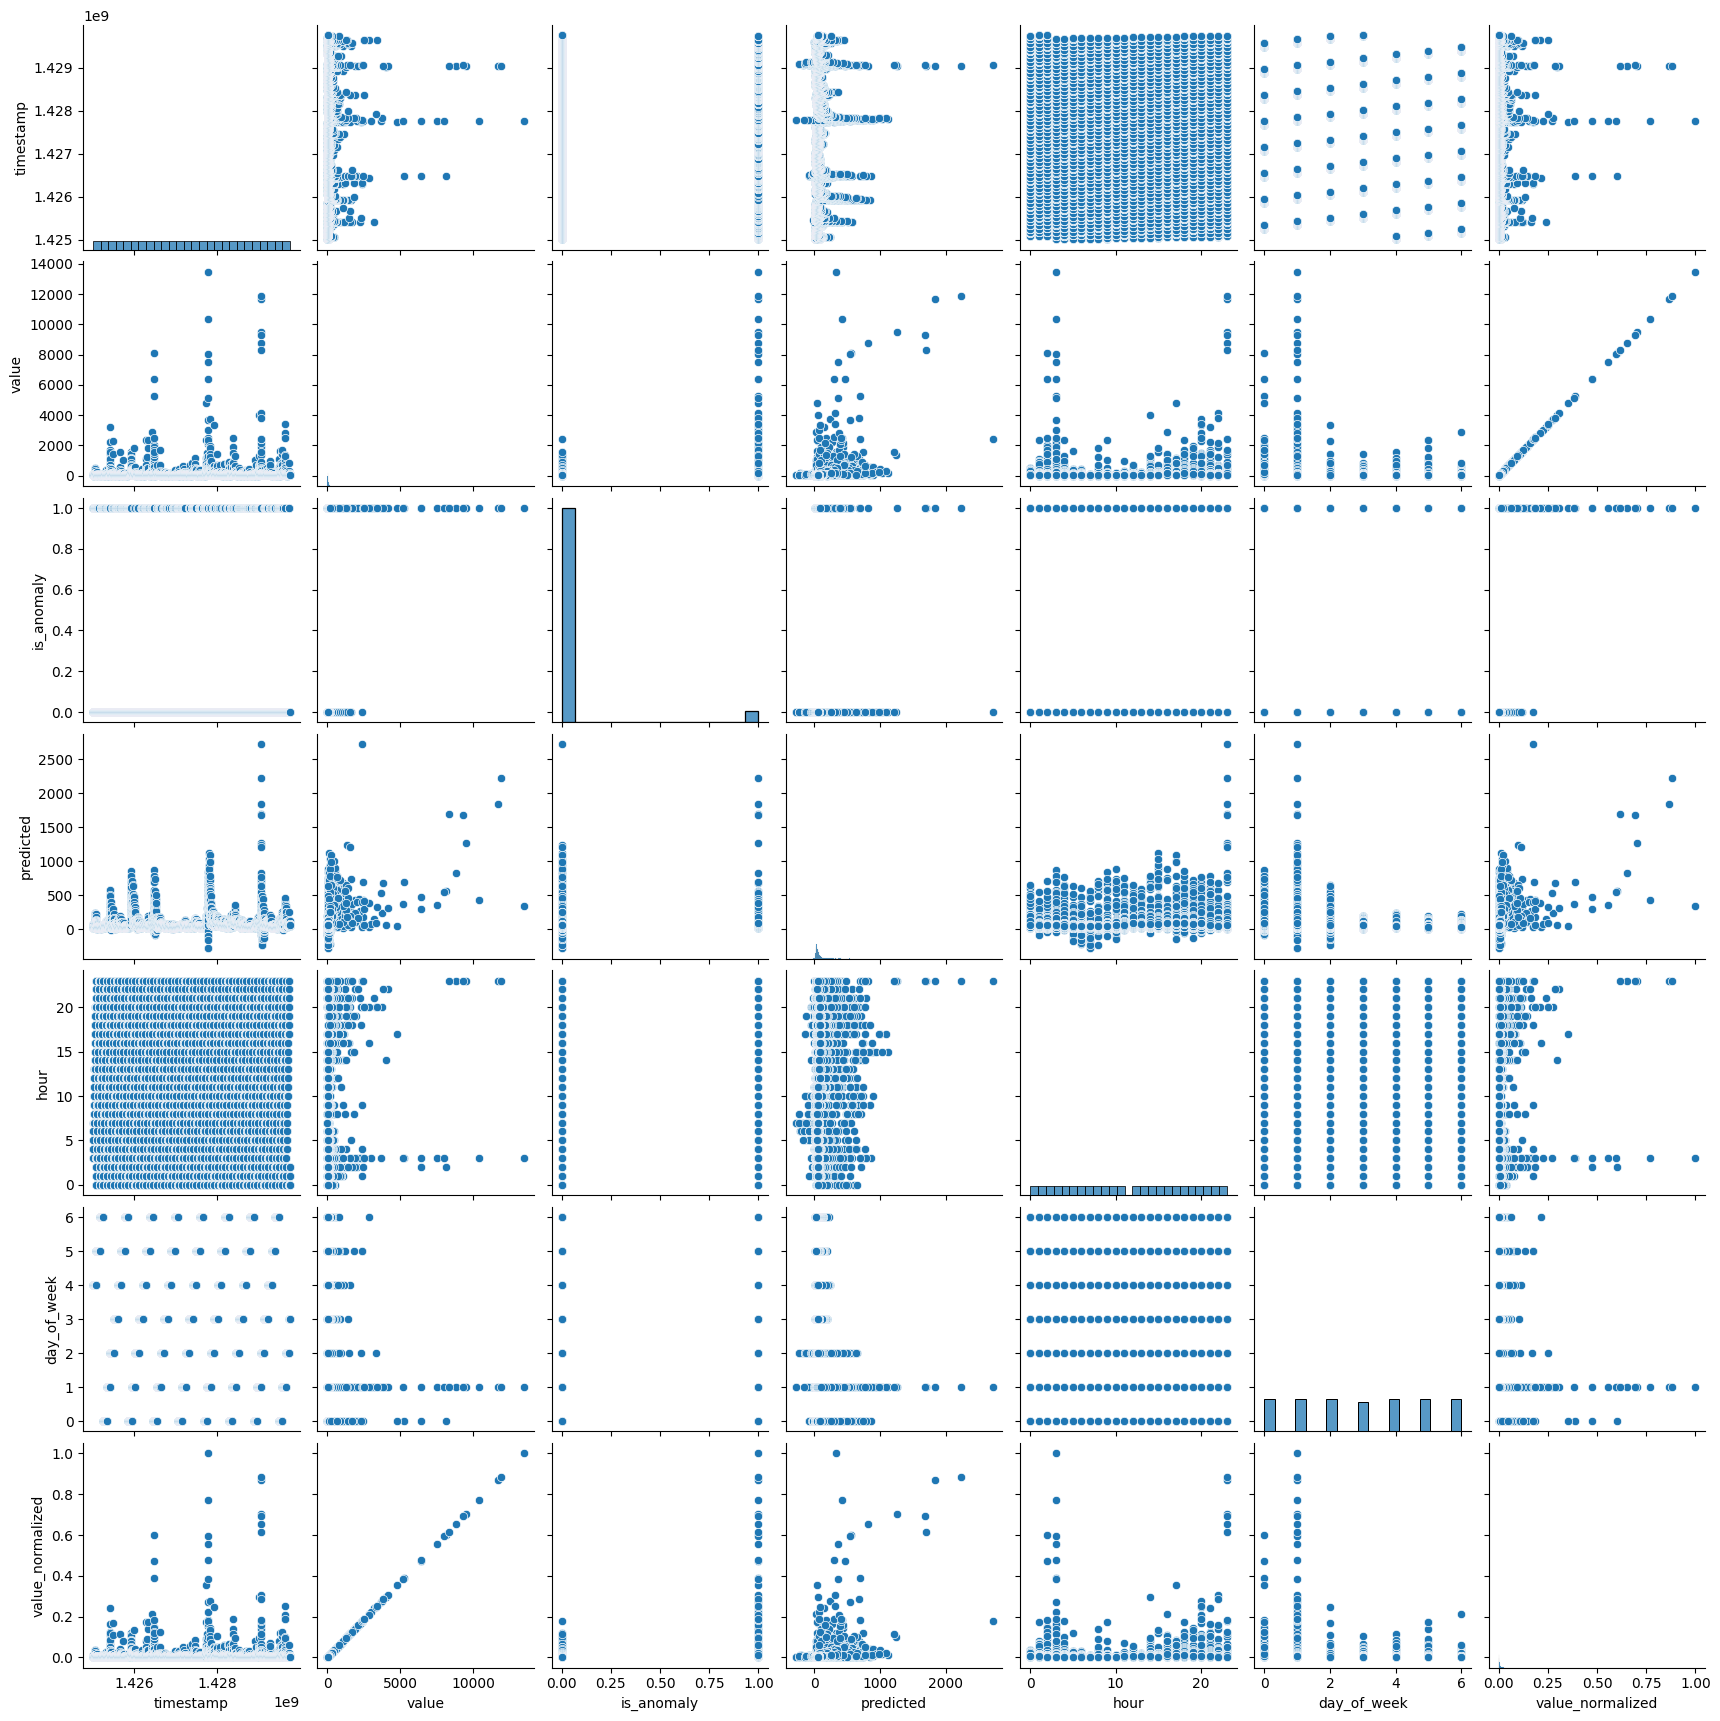

In [56]:
import seaborn as sns
sns.pairplot(train)
plt.show()

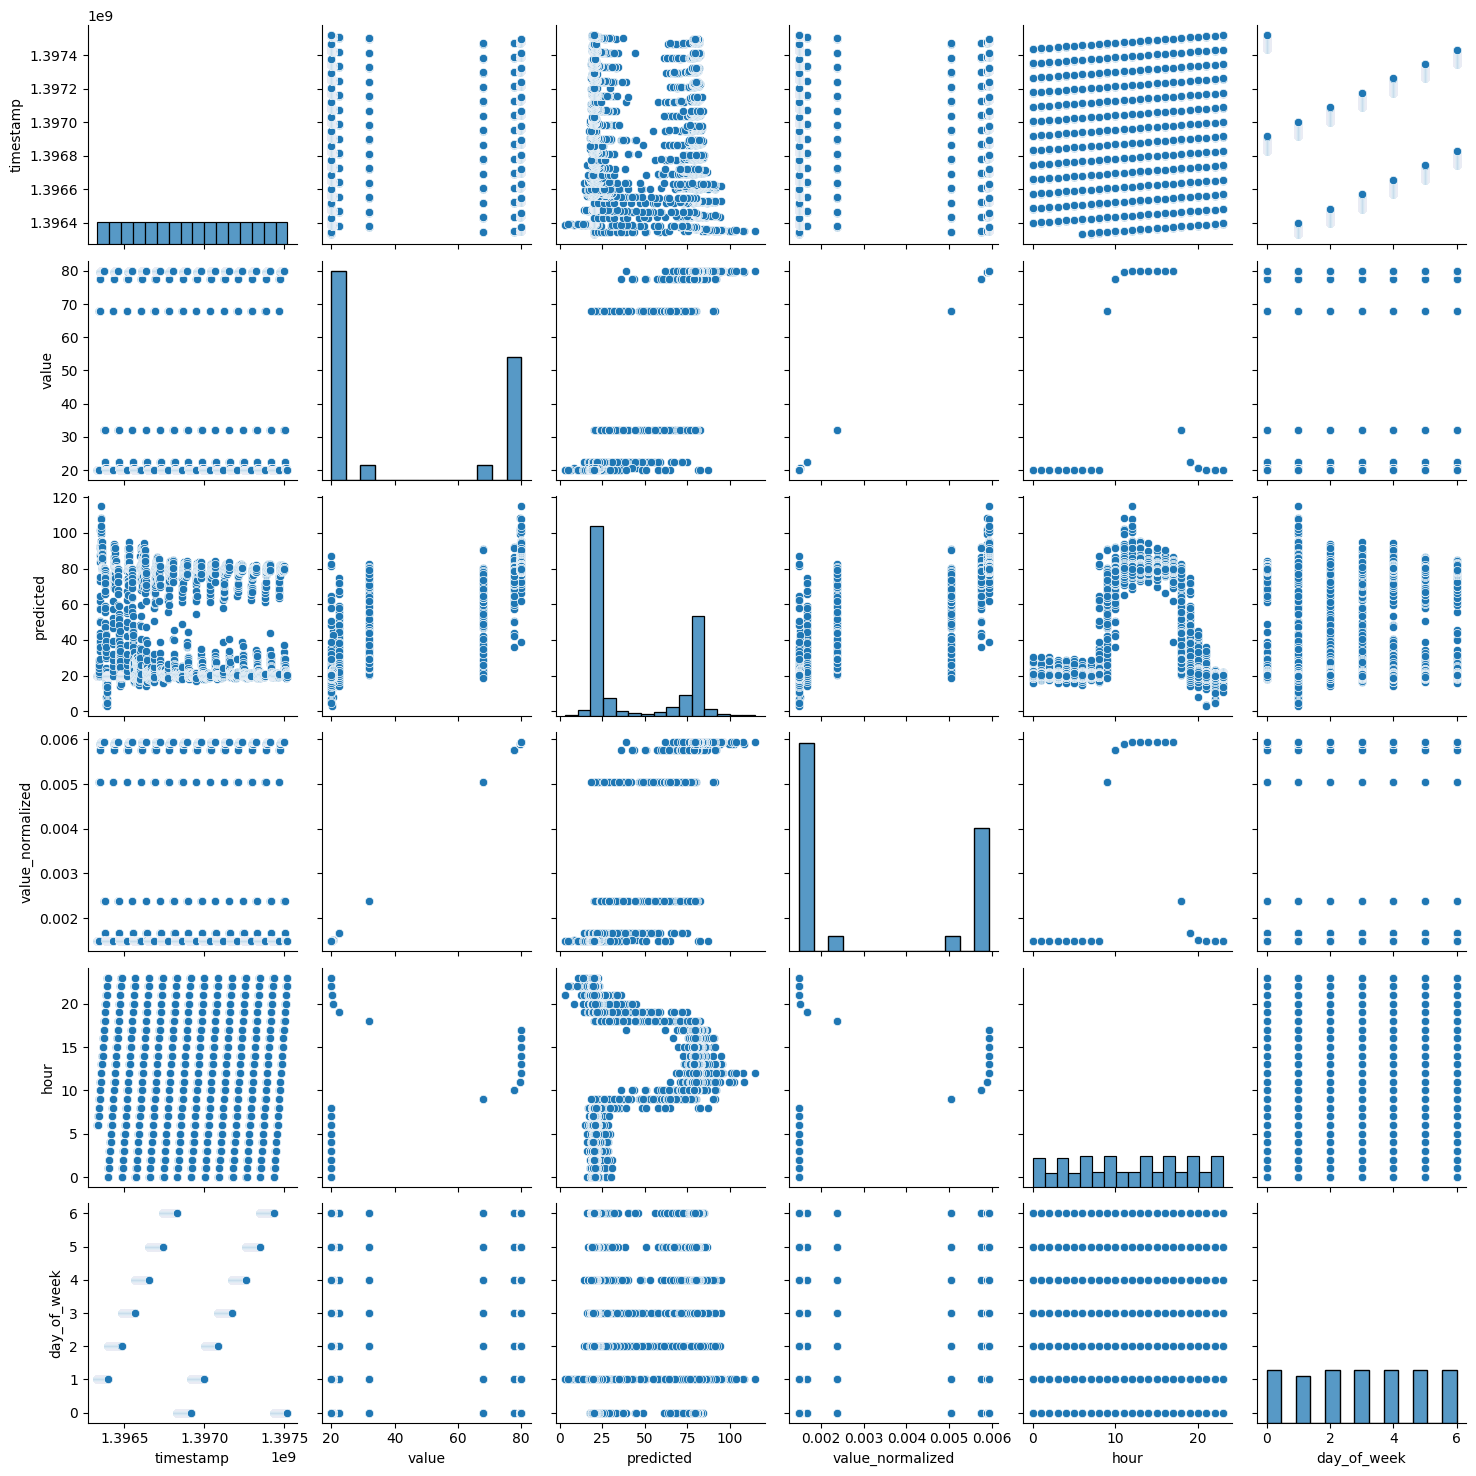

In [57]:
import seaborn as sns
sns.pairplot(test)
plt.show()

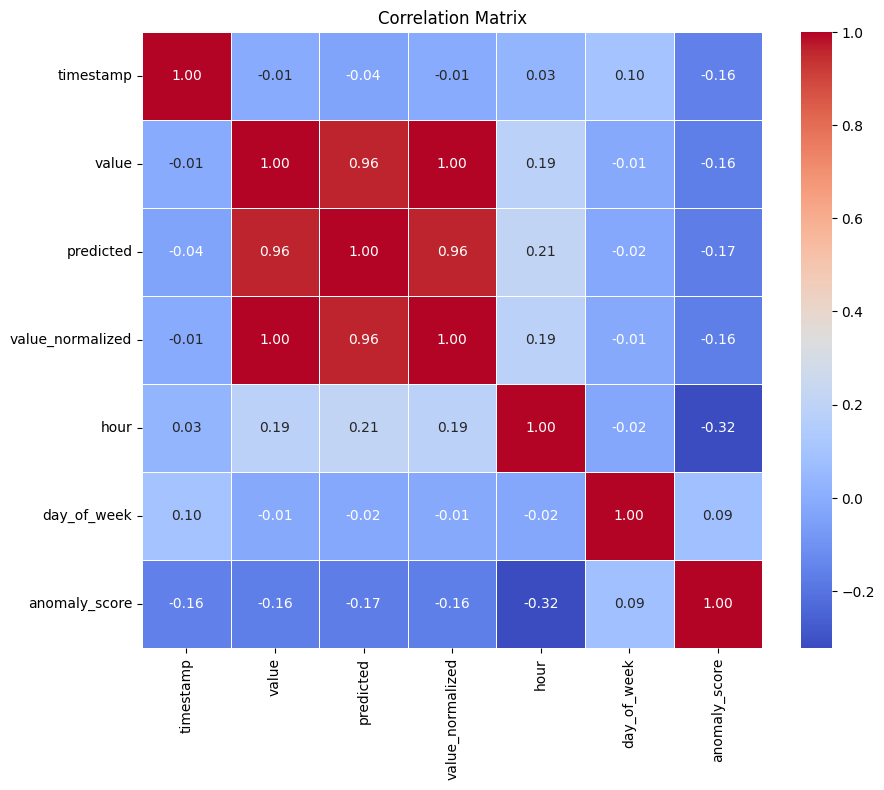

In [72]:
# Select numeric columns
numeric_columns = test.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

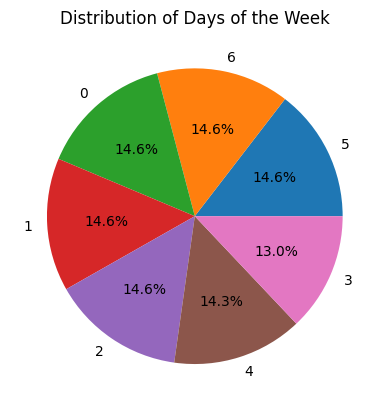

In [73]:
# prompt: pie chart

import matplotlib.pyplot as plt
# Assuming you want to create a pie chart of the 'day_of_week' distribution in the training set:

day_counts = train['day_of_week'].value_counts()
plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Days of the Week')
plt.show()


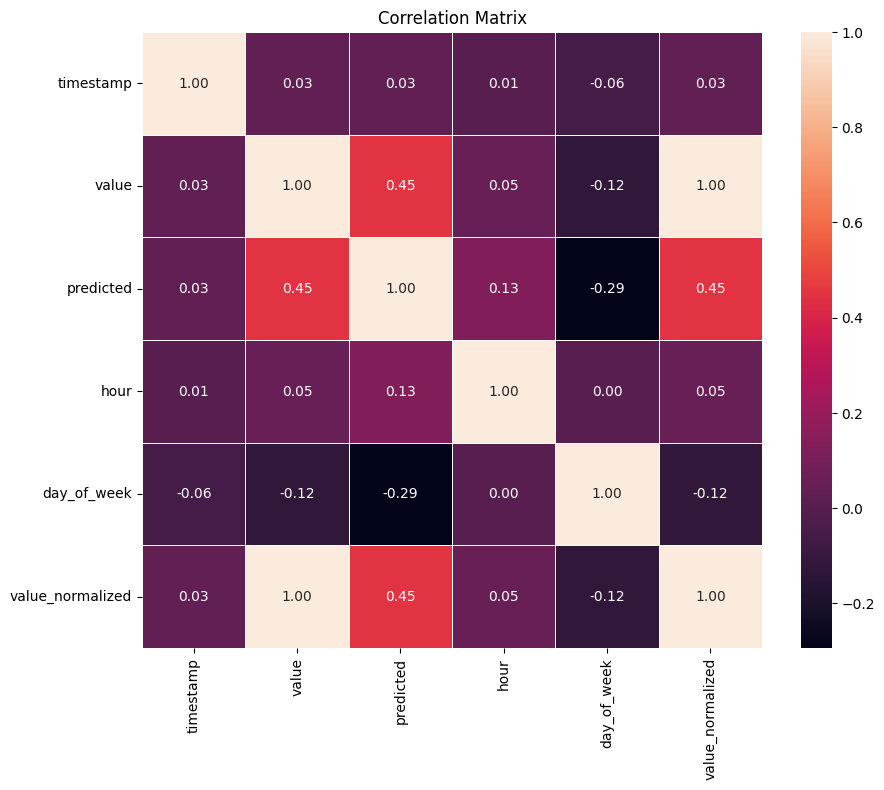

In [71]:
# Select numeric columns
numeric_columns = train.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### splitting of data

In [60]:
from sklearn.ensemble import IsolationForest # Fixed typo here: 'ensemble' instead of 'ensamble'
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [61]:
# Convert timestamp to datetime
train['datetime'] = pd.to_datetime(train['timestamp'], unit='s')
test['datetime'] = pd.to_datetime(test['timestamp'], unit='s')

In [62]:
# Extract features from datetime
train['hour'] = train['datetime'].dt.hour
train['day_of_week'] = train['datetime'].dt.dayofweek
test['hour'] = test['datetime'].dt.hour
test['day_of_week'] = test['datetime'].dt.dayofweek

In [63]:
# Normalize the value column
scaler = MinMaxScaler()
train['value_normalized'] = scaler.fit_transform(train[['value']])
test['value_normalized'] = scaler.transform(test[['value']])

In [64]:
# Select features for training
features = ['value_normalized', 'hour', 'day_of_week']

model=IsolationForest(contamination=0.1,random_state=42)

In [65]:

# Train the model on the test dataset
model.fit(test[features])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [66]:
# Predict anomalies
test['anomaly'] = model.predict(test[features])

In [68]:
# Predict anomaly scores
test['anomaly_score'] = model.decision_function(test[features])

# Set a threshold for anomaly detection (you might need to tune this)
threshold = -0.1

# Identify anomalies
test['anomaly'] = test['anomaly_score'] < threshold  # Anomalies have scores below the threshold

In [69]:
test['anomaly_score']

0       0.103766
1       0.103766
2       0.103766
3       0.103766
4       0.103766
          ...   
3955    0.029669
3956    0.029669
3957    0.029669
3958    0.029669
3959    0.029669
Name: anomaly_score, Length: 3960, dtype: float64

In [70]:
test['anomaly']

0       False
1       False
2       False
3       False
4       False
        ...  
3955    False
3956    False
3957    False
3958    False
3959    False
Name: anomaly, Length: 3960, dtype: bool